# ЛР 2 — СТАТИСТИЧЕСКИЙ И СПЕКТРАЛЬНЫЙ АНАЛИЗ ВРЕМЕННЫХ РЯДОВ

***

Кабанов Евгений, РИМ-181226, 9 вариант

In [118]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
import scipy
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

Данные из варианта (9 вариант)

In [8]:
X = [12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.1, 46.22, 23.63, 47.3, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.1]
X = np.asarray(X);

In [9]:
X.size == 24

True

Анализ ряда

In [55]:
def create_linspace(start, stop, nsamples):
    return np.linspace(start, stop, num = nsamples)

def analyse_time_series(X, p = False):
    t = create_linspace(0, 1, X.size)
    plt.plot(t, X)
    plt.title('Исходная функция')
    plt.show()
    M = np.mean(X)
    D = np.var(X)
    print(f'Мат. ожидание: {M}')
    print(f'Дисперсия: {D}')
    acf = plot_acf(X, lags=20)
    if not p:
        return M, D, acf

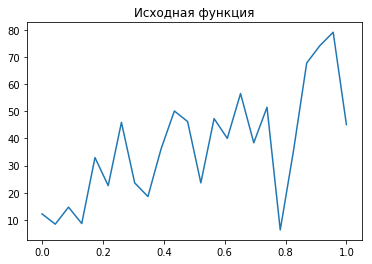

Мат. ожидание: 36.89333333333333
Дисперсия: 409.07998055555555


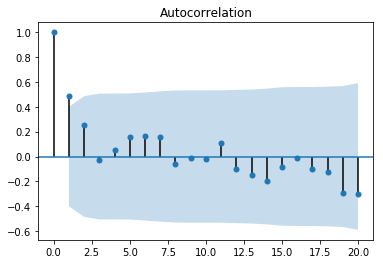

In [56]:
M, D, acf = analyse_time_series(X)

построить периодограмму ряда и сделать на ее основе выводы о характере временного ряда. Сравнить их с результатами, сделанными на основе анализа автокорреляционной функции.

In [61]:
def compare_plot(plt1_x, plt1_y, plt2_x, plt2_y):
    
    plt.plot(plt1_x, plt1_y)
    plt.plot(plt2_x, plt2_y)
    plt.legend(['1', '2'])
    
    plt.show()

In [52]:
def compare_semilogy(plt1_x, plt1_y, plt2_x, plt2_y):
    
    plt.semilogy(plt1_x, plt1_y)
    plt.semilogy(plt2_x, plt2_y)
    plt.legend(['1', '2'])
    
    plt.show()

In [13]:
pds, pdden = signal.periodogram(X)

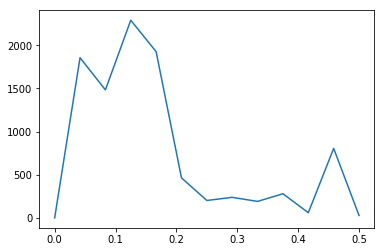

In [142]:
plt.plot(pds, pdden)
plt.show()

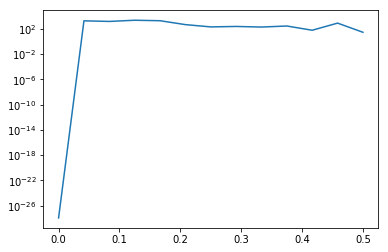

In [16]:
plt.semilogy(pds, pdden)
plt.show()

Построить оценку спектральной плотности мощности ряда с помощью метода Велша (Welch), используя функцию

In [28]:
pdw, pddenw = signal.welch(X, nperseg = 24)

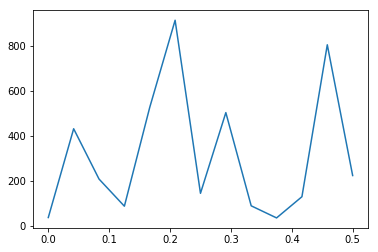

In [141]:
plt.plot(pdw, pddenw)
plt.show()

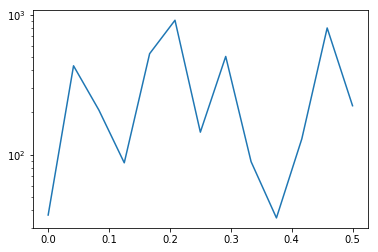

In [29]:
plt.semilogy(pdw, pddenw)
plt.show()

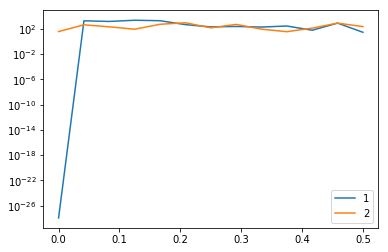

In [53]:
compare_semilogy(pds, pdden, pdw, pddenw)

## Проверка на аномальные наблюдения

Проверить с помощью метода Ирвина ряд на аномальные наблюдения. Для этого написать собственную функцию, реализующую данный статистический тест, которая получает исходный ВР и возвращает номера отсчетов, которые являются аномальными. Для создания метода использовать выражения из лекции 3 на страницах 13 и 14. Для N=24 принять значение критического критерия равным 1.23 (a = 0.05 ) и 1.74 (a = 0.01).

In [73]:
def custom_Irvin(X):
    coef = 1.23;
    M = np.mean(X);
    Vmean = np.sqrt(np.sum((X-M)**2)/(len(X))); #выборочное СКО
    res = np.zeros(len(X));
    for i in range(1,len(X)):
        k = np.abs(X[i]-X[i-1])/Vmean;
        if (k > coef):
            res[i] = X[i]
    return res

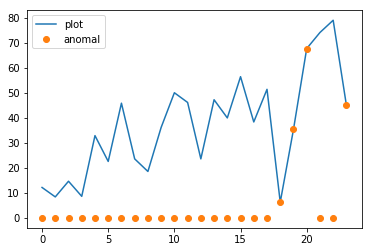

In [75]:
custom_Irvin_results = custom_Irvin(X);
plt.plot(X)
plt.plot(custom_Irvin_results, 'o')
plt.legend(['plot', 'anomal'])
plt.show()

Указать найденные номера аномальных наблюдений. Построить график ВР и указать эти точки на изображении. Изображение добавить в отчет.

Доказать, что во ВР есть неслучайная составляющая с помощью критерия серий (лекция 3, стр. 17). Построить функцию, которая бы производила расчет этого критерия для заданного ряда, с выводом результатов в виде конкретных предложений вида «гипотеза о неизменности среднего значения ВР отвергается с вероятностью ошибки альфа» или «принятие альтернативной гипотезы о неслучайной составляющей ряда» и т.п. Для этого используйте функцию print('Строка для вывода'), чтобы выводить в командное окно строки.

## Оценка на неслучайную составляющую

In [151]:
def criteria_series(X):
    N = X.size
    
    M = X[(N+1)/2] if N % 2 > 0 else 0.5*(X[np.int(N/2)] + X[np.int(N/2) + 1])

    if (X[0] > M):
        current = 1
    else:
        current = 0
    vcount = 0 #общее число серий
    tlength = 0 #протяженность текущей серии
    tmax = 0;#протяженность самой длинной серии
    for i in range(1,N):
        print(f'step {i}: {X[i] > M}' )
        if (X[i] > M): # Серия +
            if (current != 1):
                vcount = vcount + 1
                if (tlength > tmax):
                    tmax = tlength
                tlength = 0
            else:
                tlength = tlength + 1
            current = 1
        elif (X[i] < M): # Серия -
            if (current != 1):
                vcount = vcount + 1
                if (tlength > tmax):
                    tmax = tlength
                tlength = 0
            else:
                tlength = tlength + 1
            current = 1
            
    if ((vcount <= 0.5*(N+2-1.96*np.sqrt(N-1))))|(tmax >= 1.43*np.log(N+1)):
        res = 'принятие альтернативной гипотезы о неслучайной составляющей ряда'
    else:
        res = 'гипотеза о неизменности среднего значения ВР отвергается с вероятностью ошибки альфа (a = 0.05)'
    return res

In [152]:
criteria_series(X)

step 1: False
step 2: False
step 3: False
step 4: False
step 5: False
step 6: True
step 7: False
step 8: False
step 9: True
step 10: True
step 11: True
step 12: False
step 13: True
step 14: True
step 15: True
step 16: True
step 17: True
step 18: False
step 19: False
step 20: True
step 21: True
step 22: True
step 23: True


'принятие альтернативной гипотезы о неслучайной составляющей ряда'

## Оценка на стационарность

### KPSS-тест

In [82]:
kpss_results, p_value, lags, critical_points = tsa.kpss(X)

In [147]:
print(f'Результат теста: {kpss_results}. Ряд стационарный: {kpss_results < 0.5}')
print(f'p-value: {p_value}. Нулевая гипотеза: {p_value < 0.05}')

Результат теста: 0.421871287191115. Ряд стационарный: True
p-value: 0.06772789345210561. Нулевая гипотеза: False


### Критерий Фишера

In [95]:
data1 = X[:X.size//2]
data2 = X[X.size//2:]

fisher_results, fisher_pvalue = stats.f_oneway(data1, data2)

In [140]:
print(f'fisher_results: {fisher_results}. p-value: {fisher_pvalue}. Нулевая гипотеза: {fisher_pvalue < 0.05}')

fisher_results: 7.531539103275881. p-value: 0.011836047979940695. Нулевая гипотеза: True


### Критерий Стьюдента

In [138]:
def criteria_student(data, alpha = 0.05):
    data1 = X[:len(data)//2]
    data2 = X[len(data)//2:]

    N1 = data1.size
    N2 = data2.size
    
    D1 = np.var(data1)
    D2 = np.var(data2)
    
    student_value = stats.t.ppf(1-alpha, N1 + N2-1)
    
    Ks = ((np.mean(data1)-np.mean(data2)) / ((len(data1)-1)*np.var(data1) + (len(data2)-1)*np.var(data2))**(1/2) *
              ((len(data1) * len(data2) * (len(data1)+len(data2)-2)) / (len(data1)+len(data2)))**(1/2))
    
#     Ks = (np.mean(data1)-np.mean(data2)/((N1 - 1) * D1 + (N2 - 1)* D2)**1/2) * ((N1*N2*(N1+N2-2)/(N1+N2))**1/2) 
    
    print(f'Ks: {Ks}. student_value = {student_value}. Гипотеза о постоянстве мат ожидания: {Ks < student_value}')

In [139]:
criteria_student(X)

Ks: -2.866395729186912. student_value = 1.7138715277470473. Гипотеза о постоянстве мат ожидания: True


Сравнить полученный критерий Стьюдента с результатами работы функции scipy.stats.ttest_ind(x, y)

In [121]:
data1 = X[:X.size//2]
data2 = X[X.size//2:]

student_result, student_pvalue = scipy.stats.ttest_ind(data1, data2)

In [137]:
print(f'student_result: {student_result}. p-value: {student_pvalue}. Нулевая гипотеза: {student_pvalue < 0.05}')

student_result: -2.744364972680545. p-value: 0.011836047979940676. Нулевая гипотеза: True
